# 1. 라이브러리 설치

In [39]:
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

C:\Users\hi\anaconda3\envs\p36t19_beautygan\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hi\anaconda3\envs\p36t19_beautygan\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hi\anaconda3\envs\p36t19_beautygan\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hi\anaconda3\envs\p36t19_beautygan\lib\s

# 2. 모델 불러오기

In [22]:
# 학습된 모델 불러오기
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor("./models/shape_predictor_5_face_landmarks.dat")

# 3. 소스파일 불러오기

In [23]:
img = dlib.load_rgb_image("./source/aespa.jpg")

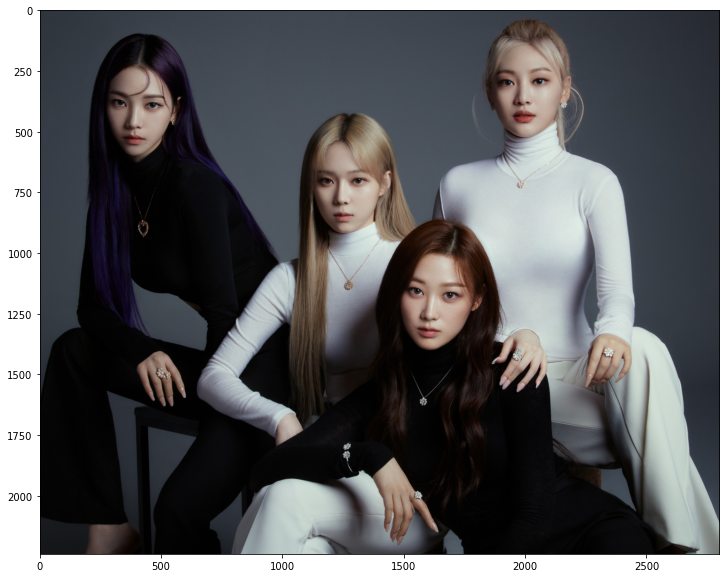

In [24]:
# 화면에 표시
plt.figure(figsize=(16, 10))
plt.imshow(img)

# 4. 얼굴 추출하기

In [25]:
imgs = img.copy()

dets = detector(imgs, 1)

print(dets)

rectangles[[(1454, 1097) (1775, 1418)], [(260, 320) (527, 587)], [(1787, 162) (2173, 547)], [(1122, 647) (1389, 914)]]


# 5. 검출데이터 얼굴영역 바운딩박스(BoundingBox) 그리기

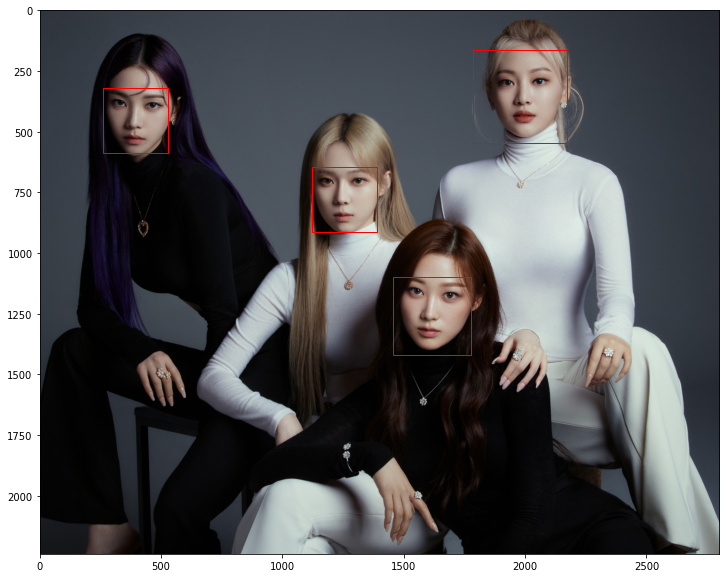

In [26]:
fig, ax = plt.subplots(1, figsize=(16, 10))

for det in dets:
    x = det.left()
    y = det.top()
    w = det.width()
    h = det.height()
    rect = patches.Rectangle(
        (x, y),
        w,
        h,
        linewidth=1,
        edgecolor='r',
        facecolor='none'
    )
    ax.add_patch(rect)
    
ax.imshow(imgs)

# 6. 5개의 점으로 사람의 얼굴(랜드마크)를 인식

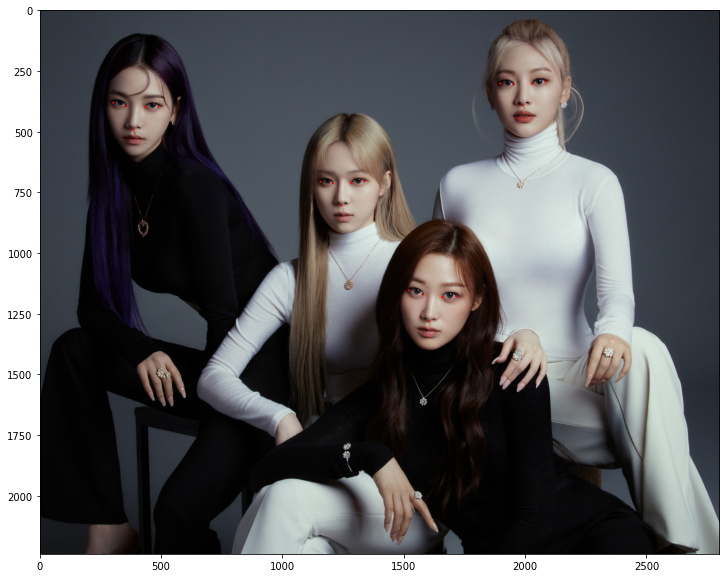

In [27]:
fig, ax = plt.subplots(1, figsize=(16, 10))

objects = dlib.full_object_detections()

for det in dets:
    s = sp(img, det)
#     print(s.parts())
    objects.append(s)
    
    for point in s.parts():
        # 점 Circle
        circle = patches.Circle(
            (point.x, point.y),
            radius=2,
            edgecolor='r',
            facecolor='r'
        )
        ax.add_patch(circle)
        
ax.imshow(imgs)

# 7. 얼굴 수평작업(Alignment) 작업 - 전처리 작업중...

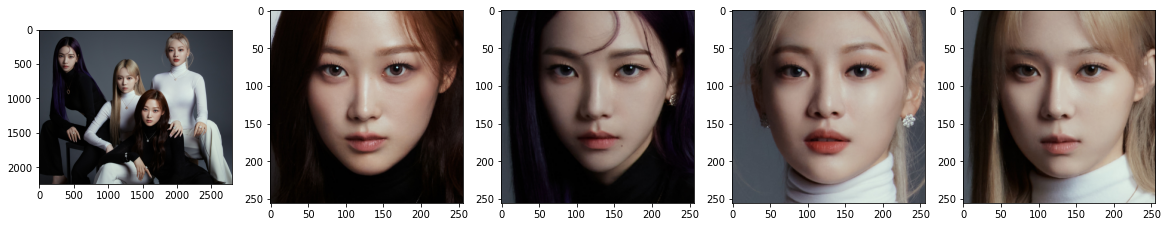

In [32]:
faces = dlib.get_face_chips(img, objects, size=256, padding=0.3)

fig, axes = plt.subplots(1, len(faces)+1, figsize=(20, 16))
axes[0].imshow(img)

for i, face in enumerate(faces):
    axes[i+1].imshow(face)

# 8. 얼굴 분리하는 함수 만들기

In [33]:
def align_faces(img):
    dets = detector(img, 1)
    
    objs = dlib.full_object_detections()
    
    for det in dets:
        s = sp(img, det)
        objs.append(s)
        
    faces = dlib.get_face_chips(img, objs, size=256, padding=0.3)
    
    return faces

In [34]:
# 이미지를 넣고 얼굴을 분리하는 함수 테스트
test_img = dlib.load_rgb_image('./source/ive.jpg')
test_faces = align_faces(test_img)

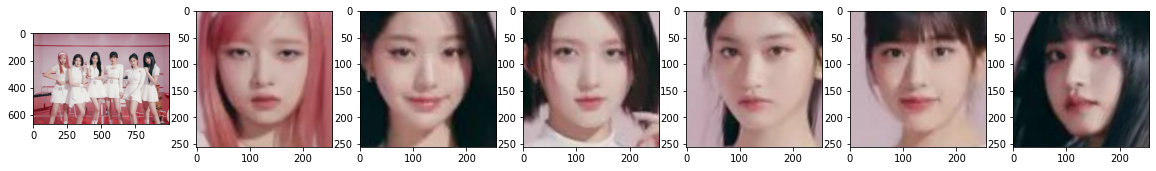

In [36]:
# 얼굴 추출 표시
fig, axes = plt.subplots(1, len(test_faces)+1, figsize=(20, 16))
axes[0].imshow(test_img)

for i, face in enumerate(test_faces):
    axes[i+1].imshow(face)

# 9. BeautyGan Pre-Trained 모델 불러오기

In [40]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [43]:
saver = tf.train.import_meta_graph('./gan/model.meta')
saver.restore(sess, tf.train.latest_checkpoint('./gan'))
graph = tf.get_default_graph()

INFO:tensorflow:Restoring parameters from ./gan\model


In [44]:
X = graph.get_tensor_by_name('X:0')  # source
Y = graph.get_tensor_by_name('Y:0')  # reference
Xs = graph.get_tensor_by_name('generator/xs:0')  # output

# 10. 전처리 함수

In [45]:
# 전처리
def preprocess(img):
    return img.astype(np.float32) / 127.5 - 1. # -1~1

# 전처리 복원
def postprocess(img):
    return ((img + 1.) * 127.5).astype(np.uint8)

# 11. 실제 적용

In [60]:
# 원본이미지 얼굴 추출
s_img = dlib.load_rgb_image('./source/aespa.jpg')
img1_faces = align_faces(s_img)

In [61]:
# 레퍼런스이미지 얼굴 추출
r_img = dlib.load_rgb_image('./imgs/makeup/vFG756.png')
img2_faces = align_faces(r_img)

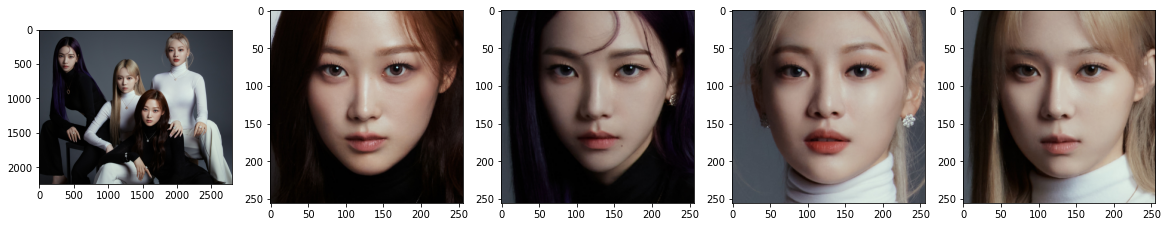

In [62]:
# 얼굴 추출 표시
fig, axes = plt.subplots(1, len(img1_faces)+1, figsize=(20, 16))
axes[0].imshow(s_img)

for i, face in enumerate(img1_faces):
    axes[i+1].imshow(face)

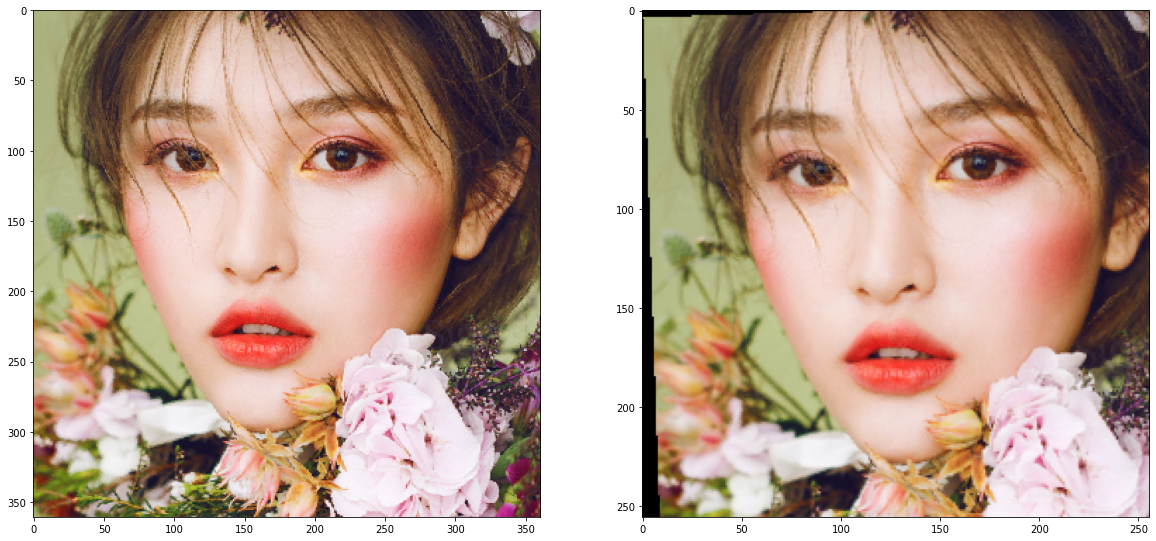

In [63]:
# 얼굴 추출 표시
fig, axes = plt.subplots(1, len(img2_faces)+1, figsize=(20, 16))
axes[0].imshow(r_img)

for i, face in enumerate(img2_faces):
    axes[i+1].imshow(face)

# 12. 얼굴 화장 적용하기

In [64]:
src_img = img1_faces[1]
ref_img = img2_faces[0]

# 원본이미지 전처리
X_img = preprocess(src_img)
X_img = np.expand_dims(X_img, axis=0)

# 레퍼런스 이미지 전처리
Y_img = preprocess(ref_img)
Y_img = np.expand_dims(Y_img, axis=0)

In [65]:
# BeautyGAN 실행
output = sess.run(Xs, feed_dict={
    X : X_img,
    Y : Y_img
})

In [66]:
# 전처리 복원
output_img = postprocess(output[0])

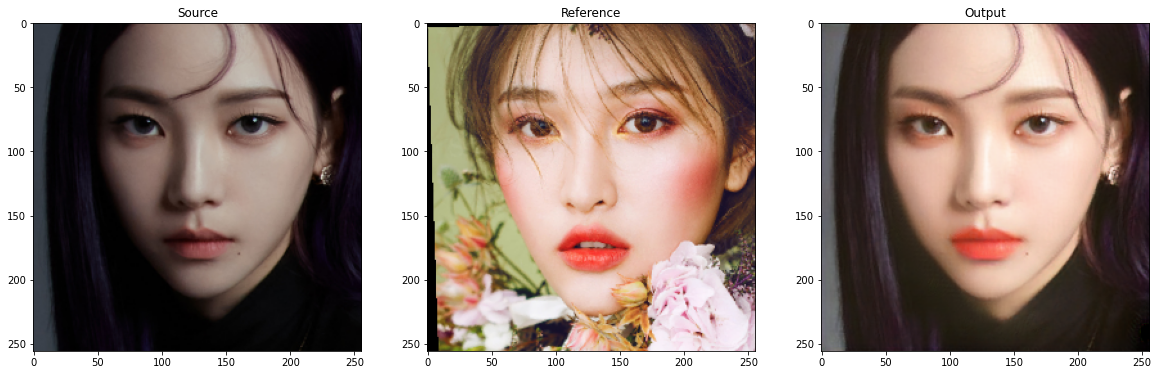

In [67]:
# 결과 화면에 표시
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].set_title('Source')
axes[0].imshow(src_img)
axes[1].set_title('Reference')
axes[1].imshow(ref_img)
axes[2].set_title('Output')
axes[2].imshow(output_img)